# Packages Import

In this section, necessary libraries for data manipulation, visualization, and machine learning are imported. These libraries include:
- `gdown`: For downloading files from Google Drive.
- `numpy`: For numerical computations.
- `pandas`: For data manipulation and analysis.
- `matplotlib` and `seaborn`: For data visualization.
- `sklearn.preprocessing.StandardScaler`: For feature scaling.
- `sklearn.ensemble.RandomForestClassifier`, `GradientBoostingClassifier`: For machine learning models.
- `sklearn.metrics`: For evaluating model performance.
- `sklearn.svm.SVC`: For Support Vector Machine classification.
- `sklearn.model_selection.GridSearchCV`, `train_test_split`: For hyperparameter tuning and splitting the data.
- `imblearn.over_sampling.SMOTE`: For handling class imbalance.
- `tensorflow` and `keras`: For building neural network models.

In [ ]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data Loading

In this section, the dataset are downloaded from Google Drive and Kaggle. The steps are below:
1. Use `gdown` to download the Kaggle API key from Google Drive.
2. Install the Kaggle API.
3. Set up Kaggle configuration.
4. Download the dataset from Kaggle.
5. Unzip the downloaded dataset.

In [ ]:
api = 'https://drive.google.com/uc?id=1HwbZemgag2jcb9QcEaJ1KcOajF8_xW36'

gdown.download(api, 'kaggle.json', quiet=False)

!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d bhuviranga/customer-churn-data
!unzip /content/customer-churn-data.zip

Downloading...
From: https://drive.google.com/uc?id=1HwbZemgag2jcb9QcEaJ1KcOajF8_xW36
To: /content/kaggle.json
100%|██████████| 65.0/65.0 [00:00<00:00, 162kB/s]


Dataset URL: https://www.kaggle.com/datasets/bhuviranga/customer-churn-data
License(s): DbCL-1.0
  0% 0.00/187k [00:00<?, ?B/s]
100% 187k/187k [00:00<00:00, 79.0MB/s]
Archive:  /content/customer-churn-data.zip
  inflating: Bank Customer Churn Prediction.csv  


# Data Understanding

This section loads the dataset and inspects its structure by displaying information about its columns, data types, and non-null values.

In [ ]:
# load the dataset
dataset = '/content/Bank Customer Churn Prediction.csv'
a = pd.read_csv(dataset)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


There are several columns that could be categorized, such as:
1. Categorical data: country, gender, tenure, products_number
2. Numerical data: age, credit_score, balance, estimated_salary
3. Boolean data: credit_card, active_member, churn
4. The target column is the CHURN column, to find out the customer credit card churn rate.

In [ ]:
numerical_features = ['age', 'credit_score', 'balance', 'estimated_salary']
categorical_features = ['country', 'gender', 'tenure', 'products_number']
boolean_columns = ['credit_card', 'active_member', 'churn']

This section provides an overview of the dataset, including:
1. The number of samples and features.
2. Checking for duplicate entries.
3. Checking for missing values in each column.

In [ ]:
# checking column shape
q = a.shape
print(f"Number of samples: {q[0]}")
print(f"Number of features: {q[1]}")

# duplicate check
w = a.duplicated().sum()
print(f"Duplicated data: {w}")

# checking null
e = a.isnull().sum()
print("Missing value:")
for column, value in e.items():
    print(f"- {column}: {value}")

Number of samples: 10000
Number of features: 12
Duplicated data: 0
Missing value:
- customer_id: 0
- credit_score: 0
- country: 0
- gender: 0
- age: 0
- tenure: 0
- balance: 0
- products_number: 0
- credit_card: 0
- active_member: 0
- estimated_salary: 0
- churn: 0


# Exploratory Data Analysis (EDA)

## Numerical Data

This section provides a statistical summary of the numerical features in the dataset. The summary includes count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each numerical feature.

In [ ]:
a[numerical_features].describe()

,age,credit_score,balance,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,650.528800,76485.889288,100090.239881
std,10.487806,96.653299,62397.405202,57510.492818
min,18.000000,350.000000,0.000000,11.580000
25%,32.000000,584.000000,0.000000,51002.110000
50%,37.000000,652.000000,97198.540000,100193.915000
75%,44.000000,718.000000,127644.240000,149388.247500
max,92.000000,850.000000,250898.090000,199992.480000


This section visualizes the distribution of numerical features using histograms. The histograms provide insights into the frequency and spread of values for each numerical feature.

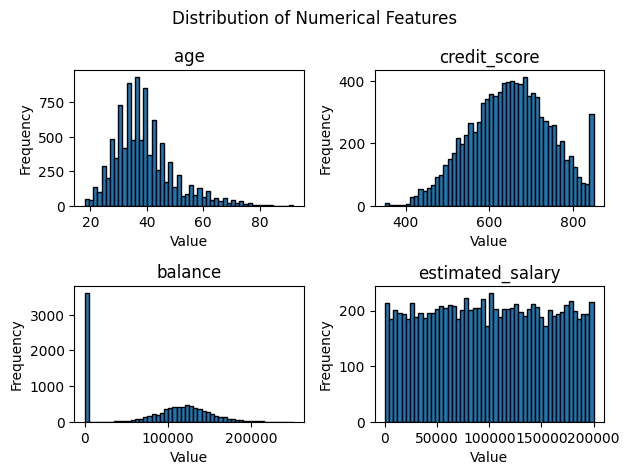

In [ ]:
# distribution analysis
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Distribution of Numerical Features')

for ax, feature in zip(axes.flatten(), numerical_features):
    ax.hist(a[feature], bins=50, edgecolor='black')
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Since they zero balance are valid, therefore the zero balances in the dataset is retained.

## Categorical Feature

### Country

This section analyzes the distribution of `country` column by counting the number of customer for each country, calculating the percentage, and creating a bar plot to visualize the distribution.

         number of samples  percentage
country                               
France                5014        50.1
Germany               2509        25.1
Spain                 2477        24.8


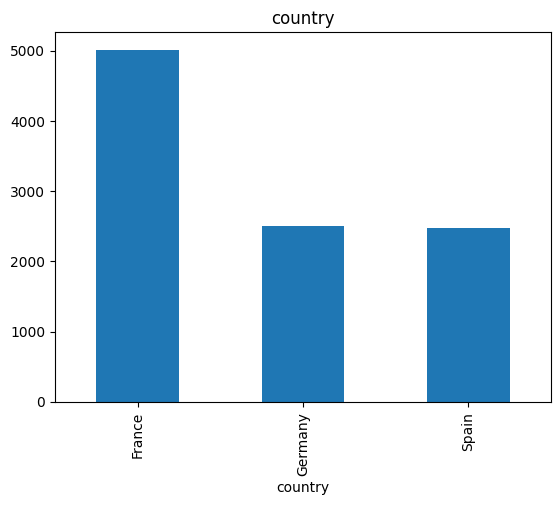

In [ ]:
feature = categorical_features[0]
count = a[feature].value_counts()
percent = 100*a[feature].value_counts(normalize=True)
df = pd.DataFrame({'number of samples':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Gender

This section analyzes the distribution of `Gender` column by counting the number of customer for each gender, calculating the percentage, and creating a bar plot to visualize the distribution.

        number of samples  percentage
gender                               
Male                 5457        54.6
Female               4543        45.4


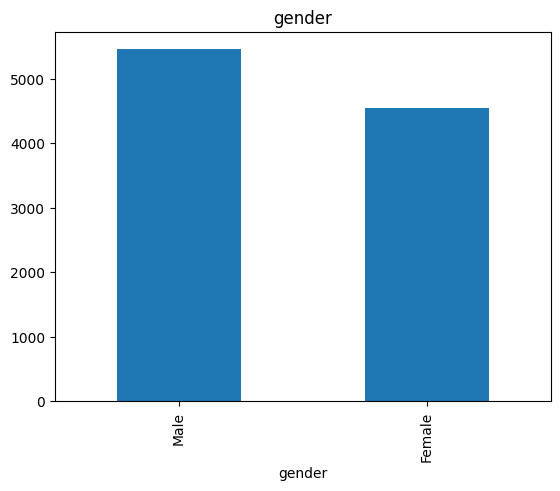

In [ ]:
feature = categorical_features[1]
count = a[feature].value_counts()
percent = 100*a[feature].value_counts(normalize=True)
df = pd.DataFrame({'number of samples':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Tenure

This section analyzes the distribution of `tenure` column by counting the number of customer for each tenure, calculating the percentage, and creating a bar plot to visualize the distribution.

        number of samples  percentage
tenure                               
0                     413         4.1
1                    1035        10.4
2                    1048        10.5
3                    1009        10.1
4                     989         9.9
5                    1012        10.1
6                     967         9.7
7                    1028        10.3
8                    1025        10.2
9                     984         9.8
10                    490         4.9


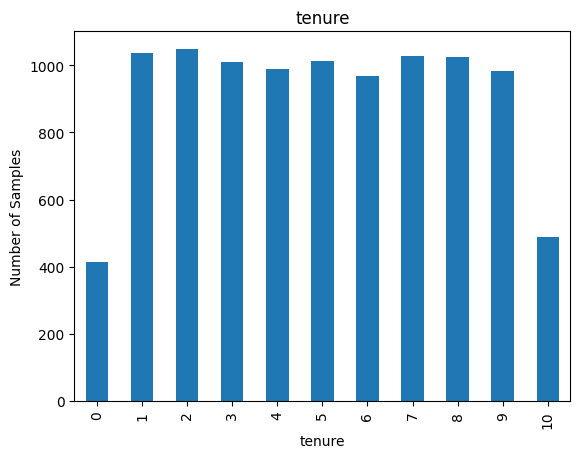

In [ ]:
feature = categorical_features[2]
count = a[feature].value_counts()
percent = 100*a[feature].value_counts(normalize=True)
df = pd.DataFrame({'number of samples':count, 'percentage':percent.round(1)})
df_sorted = df.sort_index()
print(df_sorted)
df_sorted['number of samples'].plot(kind='bar', title=feature)
plt.xlabel(feature)
plt.ylabel('Number of Samples')
plt.show()

### Products

This section analyzes the distribution of `products_number` column by counting the number of customer for each product, calculating the percentage, and creating a bar plot to visualize the distribution.

                 Number of Samples  Percentage
products_number                               
1                             5084        50.8
2                             4590        45.9
3                              266         2.7
4                               60         0.6


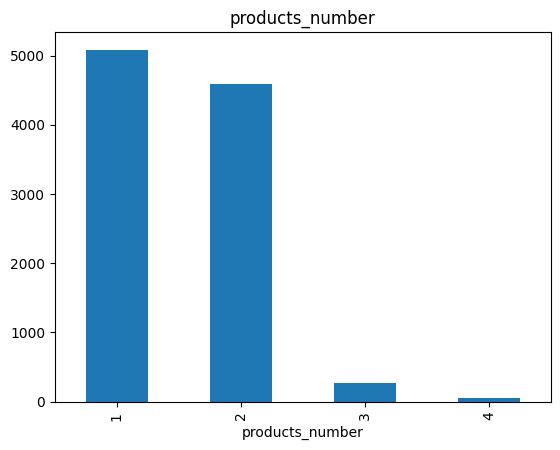

In [ ]:
feature = categorical_features[3]
count = a[feature].value_counts()
percent = 100*a[feature].value_counts(normalize=True)
df = pd.DataFrame({'Number of Samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Boolean Column

This section visualizes the distribution of the boolean columns `credit_card`, `active_member`, and `churn` to understand the frequency of each category.

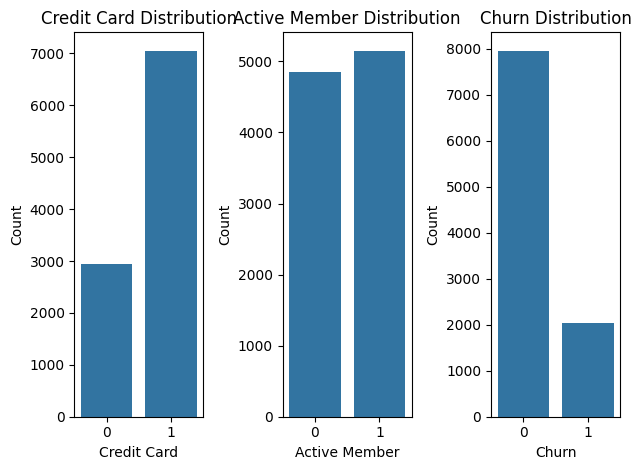

In [ ]:
# Visualize the distribution of boolean columns
fig, axs = plt.subplots(1, 3)

# Plot for 'credit_card'
sns.countplot(data=a[boolean_columns], x='credit_card', ax=axs[0])
axs[0].set_title('Credit Card Distribution')
axs[0].set_xlabel('Credit Card')
axs[0].set_ylabel('Count')

# Plot for 'active_member'
sns.countplot(data=a[boolean_columns], x='active_member', ax=axs[1])
axs[1].set_title('Active Member Distribution')
axs[1].set_xlabel('Active Member')
axs[1].set_ylabel('Count')

# Plot for 'churn'
sns.countplot(data=a[boolean_columns], x='churn', ax=axs[2])
axs[2].set_title('Churn Distribution')
axs[2].set_xlabel('Churn')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

This code cell provides a count of the values in the `churn` column to understand the distribution of customers who have churned versus those who have not.

In [ ]:
count = a['churn'].value_counts()

print(f"Churn Customer Count: {count[1]}")
print(f"Non-Churn Customer Count: {count[0]}")

Churn Customer Count: 2037
Non-Churn Customer Count: 7963


## Correlation

This section visualizes the relationship between gender and churn using a countplot. The plot shows the distribution of churned and non-churned customers for each gender category.

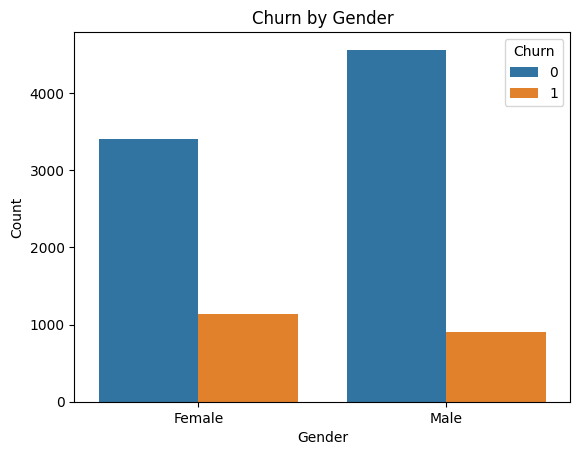

In [ ]:
# Countplot of churn by gender
plt.figure()
sns.countplot(data=a, x='gender', hue='churn')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

This section visualizes the relationship between country and churn using a countplot. The plot shows the distribution of churned and non-churned customers for each country category.

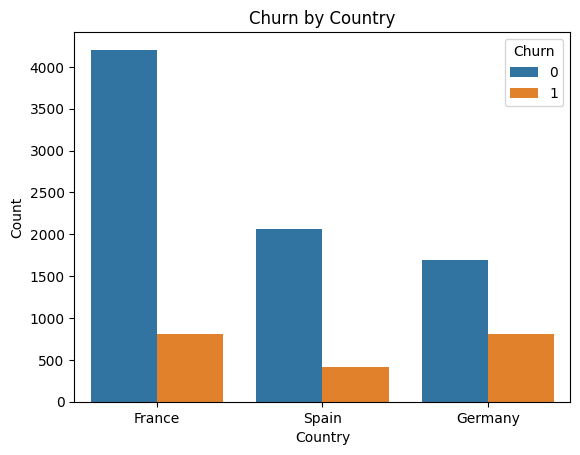

In [ ]:
# Countplot of churn by country
plt.figure()
sns.countplot(data=a, x='country', hue='churn')
plt.title('Churn by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

This section visualizes the relationship between age groups and churn using a countplot. The age groups are created by binning the age feature into specified ranges. The plot shows the distribution of churned and non-churned customers for each age group.

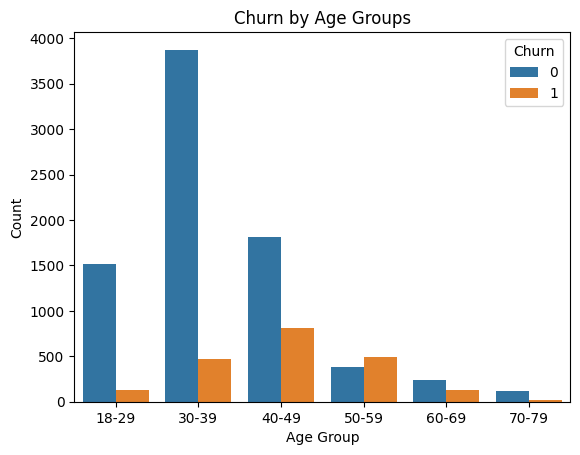

In [ ]:
# Countplot of churn by age groups
age_bins = [18, 30, 40, 50, 60, 70, 80]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79']
a['age_group'] = pd.cut(a['age'], bins=age_bins, labels=age_labels, right=False)

plt.figure()
sns.countplot(data=a, x='age_group', hue='churn')
plt.title('Churn by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

This section visualizes the relationship between the number of products used by customers and churn using a countplot. The plot shows the distribution of churned and non-churned customers for each product number category.

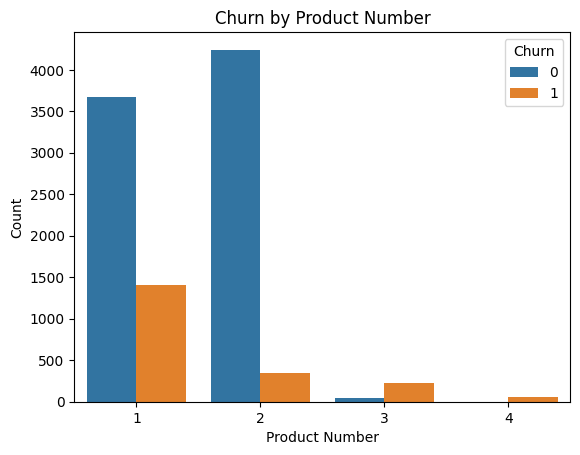

In [ ]:
# Countplot of churn by product number

plt.figure()
sns.countplot(data=a, x='products_number', hue='churn')
plt.title('Churn by Product Number')
plt.xlabel('Product Number')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

This section visualizes the relationship between active member status and churn using a countplot. The plot shows the distribution of churned and non-churned customers for each active member status category.

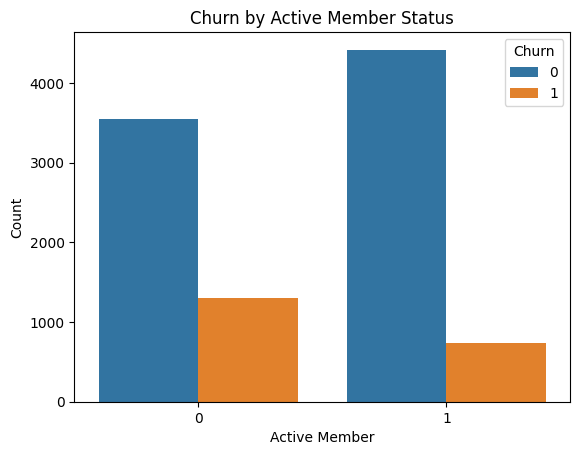

In [ ]:
# Countplot of churn by active member status

plt.figure()
sns.countplot(data=a, x='active_member', hue='churn')
plt.title('Churn by Active Member Status')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

This section visualizes the relationship between balance ranges and churn using a countplot. The balance ranges are created by binning the balance feature into specified ranges. The plot shows the distribution of churned and non-churned customers for each balance range.

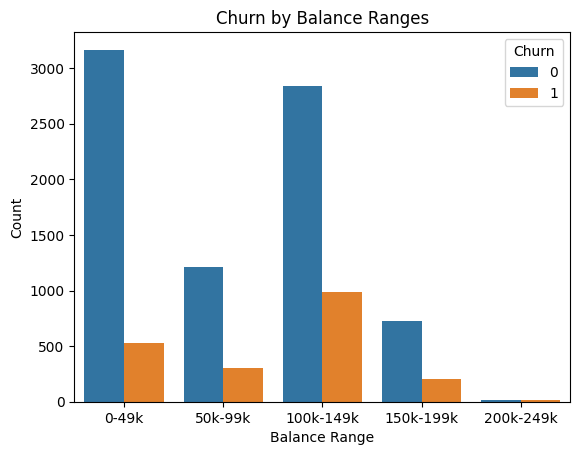

In [ ]:
# Countplot of churn by balance ranges
balance_bins = [0, 50000, 100000, 150000, 200000, 250000]
balance_labels = ['0-49k', '50k-99k', '100k-149k', '150k-199k', '200k-249k']
a['balance_range'] = pd.cut(a['balance'], bins=balance_bins, labels=balance_labels, right=False)

plt.figure()
sns.countplot(data=a, x='balance_range', hue='churn')
plt.title('Churn by Balance Ranges')
plt.xlabel('Balance Range')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

This section visualizes the relationship between credit card possession and churn using a countplot. The plot shows the distribution of churned and non-churned customers based on whether they possess a credit card.

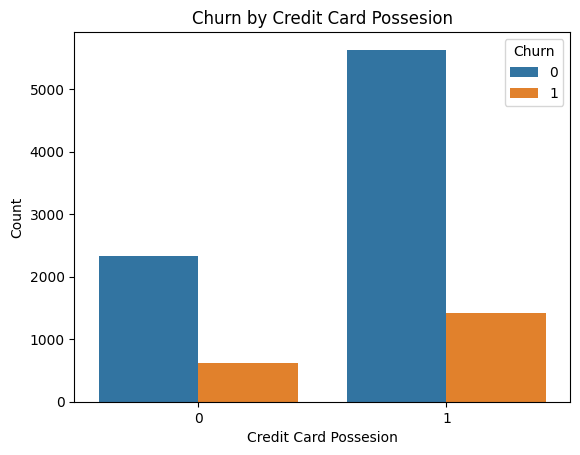

In [ ]:
# Countplot of churn by credit card possesion

plt.figure()
sns.countplot(data=a, x='credit_card', hue='churn')
plt.title('Churn by Credit Card Possesion')
plt.xlabel('Credit Card Possesion')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

This section visualizes the relationship between credit score ranges and churn using a countplot. The credit score ranges are created by binning the credit score feature into specified ranges. The plot shows the distribution of churned and non-churned customers for each credit score range.

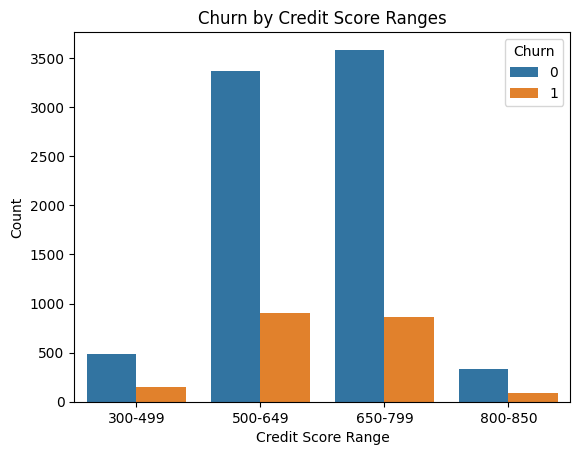

In [ ]:
# Countplot of churn by credit score ranges
credit_score_bins = [300, 500, 650, 800, 850]
credit_score_labels = ['300-499', '500-649', '650-799', '800-850']
a['credit_score_range'] = pd.cut(a['credit_score'], bins=credit_score_bins, labels=credit_score_labels, right=False)

plt.figure()
sns.countplot(data=a, x='credit_score_range', hue='churn')
plt.title('Churn by Credit Score Ranges')
plt.xlabel('Credit Score Range')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

This section performs a correlation analysis to identify the relationship between the features and the target variable `churn`. The process includes:
1. Defining the relevant numerical, categorical, and boolean features.
2. Preparing the data by converting categorical columns to numerical format.
3. Calculating the correlation matrix.
4. Extracting and visualizing the correlations with the target variable `churn`.

<ipython-input-23-fa3c2c017943>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_correlation.index, y=churn_correlation.values, palette='coolwarm')


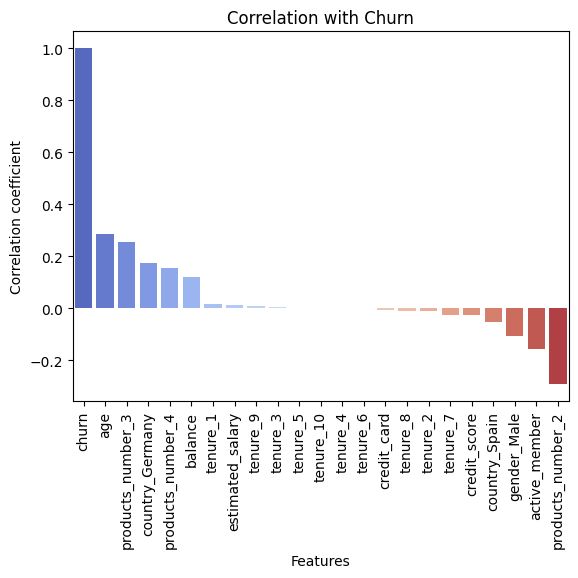

In [ ]:
# Define the variables
numerical_features = ['age', 'credit_score', 'balance', 'estimated_salary']
categorical_features = ['country', 'gender', 'tenure', 'products_number']
bool_var = ['credit_card', 'active_member', 'churn']

# Select the relevant columns for correlation analysis
selected_columns = numerical_features + categorical_features + bool_var

# Prepare the data
correlation_data = a[selected_columns]

# Convert categorical columns to numerical for correlation calculation
correlation_data = pd.get_dummies(correlation_data, columns=categorical_features, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Extract correlations with the target variable 'churn'
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)

# Plot the correlations with 'churn'
plt.figure()
sns.barplot(x=churn_correlation.index, y=churn_correlation.values, palette='coolwarm')
plt.title('Correlation with Churn')
plt.xticks(rotation=90)
plt.ylabel('Correlation coefficient')
plt.xlabel('Features')
plt.show()

It seems that some variables such as age, product number, country, balance, active_member, and gender have correlation with the churn rate. Besides those columns we will delete it.

# Data Preparation

## Cleaning Outlier Data

This section performs an outlier analysis on the numerical features using boxplots. The boxplots help in identifying any potential outliers in the data for each numerical feature.

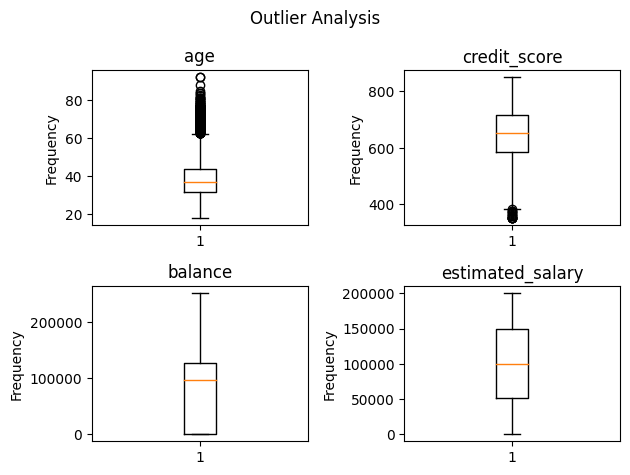

In [ ]:
# outlier analysis
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Outlier Analysis')

for ax, feature in zip(axes.flatten(), numerical_features):
    ax.boxplot(a[feature])
    ax.set_title(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

This section removes outliers from the dataset using the Interquartile Range (IQR) method. The IQR method calculates the lower and upper bounds to identify and exclude outliers from the data for specified numerical features.

In [ ]:
# IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

b = remove_outliers(a, 'age')
b = remove_outliers(b, 'credit_score')

This section checks the shape of the dataset after removing outliers to understand the impact of outlier removal on the number of samples and features.

In [ ]:
# cleaned dataset
jk = b.shape
print(f"Number of Data: {jk[0]}")
print(f"Number of Column: {jk[1]}")

Number of Data: 9627
Number of Column: 15


Now b dataframe is used because it has been cleared from the outlier.

## Feature Selection

This section performs feature selection by removing columns that are not highly correlated with the target variable or are deemed less relevant for the prediction model. The selected features will be used for building the predictive model.

In [ ]:
# Feature selection
e = b.drop(['credit_score','estimated_salary','credit_card', 'tenure', 'age_group',	'balance_range',	'credit_score_range'], axis=1)

## Encoding Category Features

This section encodes categorical variables into numerical format using one-hot encoding. It converts categorical columns such as `country`, `gender`, `products_number`, and `active_member` into binary columns. Additionally, it drops the original categorical columns and other unnecessary columns from the dataset.

In [ ]:
e = pd.concat([e, pd.get_dummies(e['country'], prefix='country')],axis=1)
e = pd.concat([e, pd.get_dummies(e['gender'], prefix='gender')],axis=1)
e = pd.concat([e, pd.get_dummies(e['products_number'], prefix='products_number')],axis=1)
e = pd.concat([e, pd.get_dummies(e['active_member'], prefix='products_number')],axis=1)
e.drop(['country','gender','products_number', 'active_member', 'customer_id'], axis=1, inplace=True)
# change into 0 or 1
e = e.replace({True: 1, False: 0})
e.head()

,age,balance,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male,products_number_1,products_number_2,products_number_3,products_number_4,products_number_0,products_number_1
0,42,0.00,1,1,0,0,1,0,1,0,0,0,0,1
1,41,83807.86,0,0,0,1,1,0,1,0,0,0,0,1
2,42,159660.80,1,1,0,0,1,0,0,0,1,0,1,0
3,39,0.00,0,1,0,0,1,0,0,1,0,0,1,0
4,43,125510.82,0,0,0,1,1,0,1,0,0,0,0,1


The e dataset is used now because it has been one-encoded.

## Train Test Split

This section splits the dataset into training and testing sets. The training set is used to train the machine learning models, while the testing set is used to evaluate the performance of the models. The split ratio used is 80-20, meaning 80% of the data is used for training and 20% for testing.

In [ ]:
# Separate features and target variable
X = e.drop(["churn"], axis=1)
y = e["churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 9627
Total # of sample in train dataset: 7701
Total # of sample in test dataset: 1926


## Handling Class Imbalance

The data between churn and non-churn customers seems imbalanced. To address this issue, the SMOTE (Synthetic Minority Over-sampling Technique) method is used. This section addresses the class imbalance in the dataset using SMOTE by:
1. Separating features and target variable.
2. Applying SMOTE to oversample the minority class.

In [ ]:
# Perform SMOTE only on the training set to handle class imbalance
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

a= y_train_over.shape
print(f'Total # of samples in the training dataset (after oversampling): {len(X_train_over)}')

Total # of samples in the training dataset (after oversampling): 12232


## Standarization

This section standardizes the numerical features to ensure they have the same scale. Standardization helps machine learning models to perform better and converge faster. The features `age` and `balance` are standardized using `StandardScaler`.

In [ ]:
# Standardize the numerical features in the training set
numerical = ['age','balance']
scaler = StandardScaler()
X_train_over[numerical] = scaler.fit_transform(X_train_over[numerical])

# Apply the same transformation to the test set
X_test[numerical] = scaler.transform(X_test[numerical])

This section provides an overview of the dataset after the data preparation steps, which include splitting, oversampling, and standardizing. The following details are displayed:
1. Total number of samples in the whole dataset.
2. Total number of samples in the training dataset after applying SMOTE.
3. Total number of samples in the testing dataset.
4. Distribution of the target variable (`churn`) in the training dataset after oversampling.
5. Distribution of the target variable (`churn`) in the testing dataset.

In [ ]:
print(f'Total # of samples in the whole dataset: {len(X)}')
print(f'Total # of samples in the training dataset (after oversampling): {len(X_train_over)}')
print(f'Total # of samples in the testing dataset: {len(X_test)}')
print(f'Distribution of target variable in training set (after oversampling):\n{y_train_over.value_counts()}')
print(f'Distribution of target variable in testing set:\n{y_test.value_counts()}')

Total # of samples in the whole dataset: 9627
Total # of samples in the training dataset (after oversampling): 12232
Total # of samples in the testing dataset: 1926
Distribution of target variable in training set (after oversampling):
churn
0    6116
1    6116
Name: count, dtype: int64
Distribution of target variable in testing set:
churn
0    1561
1     365
Name: count, dtype: int64


# Model Development

## Random Forest

This section trains a Random Forest classifier with hyperparameter tuning to get the best result on the training dataset and evaluates its performance on the testing dataset. The performance metrics used include accuracy and the classification report, which provides precision, recall, and F1 score for each class.

In [ ]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize and perform Grid Search for Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Initialize RandomForestClassifier with best parameters
rfbest = RandomForestClassifier(**best_params)
rfbest.fit(X_train, y_train)

# Make predictions
y_pred = rfbest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy on test set: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy on test set: 83.02%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1561
           1       0.87      0.12      0.22       365

    accuracy                           0.83      1926
   macro avg       0.85      0.56      0.56      1926
weighted avg       0.84      0.83      0.77      1926



## Gradient Boosting

This section trains a Gradient Boosting classifier with hyperparameter tuning to get the best result on the training dataset and evaluates its performance on the testing dataset. The performance metrics used include accuracy and the classification report, which provides precision, recall, and F1 score for each class. Additionally, the feature importances of the model are displayed.

In [ ]:

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Evaluate best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy on test set: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

# Display feature importances
feature_importances = best_gb.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.9}
Accuracy on test set: 83.02%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1561
           1       0.82      0.13      0.23       365

    accuracy                           0.83      1926
   macro avg       0.82      0.56      0.57      1926
weighted avg       0.83      0.83      0.78      1926



## Support Vector Machine (SVM)

This section trains a Support Vector Machine (SVM) classifier to get the best result on the training dataset and evaluates its performance on the testing dataset. The performance metrics used include accuracy and the classification report, which provides precision, recall, and F1 score for each class.

In [ ]:
# Initialize the SVM classifier
svm = SVC(kernel = 'linear', random_state=42)

# Perform Grid Search
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy on test set: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

Accuracy on test set: 81.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1561
           1       0.00      0.00      0.00       365

    accuracy                           0.81      1926
   macro avg       0.41      0.50      0.45      1926
weighted avg       0.66      0.81      0.73      1926



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluation

This section calculates and compares the accuracy of different models (Random Forest, Gradient Boosting, and SVM) on both the training and testing datasets. The results are presented in a DataFrame for easy comparison.

Steps:
1. **Calculate Accuracy**: The accuracy for each model is calculated on both the training and testing sets.
2. **Create DataFrame**: A DataFrame is created to organize and display the accuracy results for each model.
3. **Display Results**: The DataFrame is printed to show the comparison of model performance.

In [47]:
# Calculate accuracy on the train and test sets for each model
accuracy_train_rf = accuracy_score(y_train, rfbest.predict(X_train))
accuracy_test_rf = accuracy_score(y_test, rfbest.predict(X_test))

accuracy_train_gb = accuracy_score(y_train, best_gb.predict(X_train))
accuracy_test_gb = accuracy_score(y_test, best_gb.predict(X_test))

accuracy_train_svm = accuracy_score(y_train, svm.predict(X_train))
accuracy_test_svm = accuracy_score(y_test, svm.predict(X_test))

# Create a DataFrame to display the results
data = {
    'train': [accuracy_train_rf, accuracy_train_gb, accuracy_train_svm ],
    'test': [accuracy_test_rf, accuracy_test_gb, accuracy_test_svm]
}

df = pd.DataFrame(data, index=['Random Forest', 'Boosting', 'SVM'])

# Display the DataFrame
print(df)

                  train      test
Random Forest  0.877678  0.830218
Boosting       0.873653  0.830218
SVM            0.787170  0.810488


This section creates a horizontal bar plot to visually compare the accuracy of different models (Random Forest, Gradient Boosting, and SVM) on both the training and testing datasets.

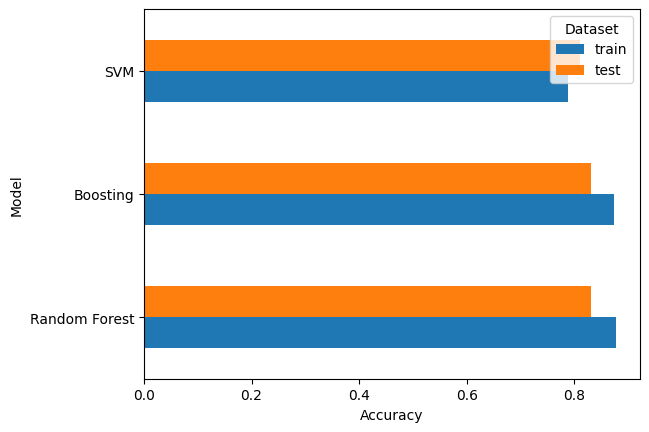

In [59]:
fig, ax = plt.subplots()
df.plot(kind='barh', ax=ax)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')
ax.legend(title='Dataset')

plt.show()

In conclusion, the best prediction algorithm to use is Random Forest with 83.02% accuracy.